# Importing Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [8]:
# extracting the data from the subfolders
data = image_dataset_from_directory("IndianCurrencyNotesDataset/AllImages/",
                                    labels='inferred',
                                    label_mode='categorical',
                                    shuffle=True,
                                    seed=123,
                                    batch_size=32,
                                    image_size=(224, 224))

Found 177 files belonging to 7 classes.


In [12]:
# splitting the data into training and testing
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

train_data = data.take(train_size)
test_data = data.skip(train_size)
test_data = data.take(test_size)

In [13]:
# doing data augmentation on the training data with resizing and rotation
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1./255)
])

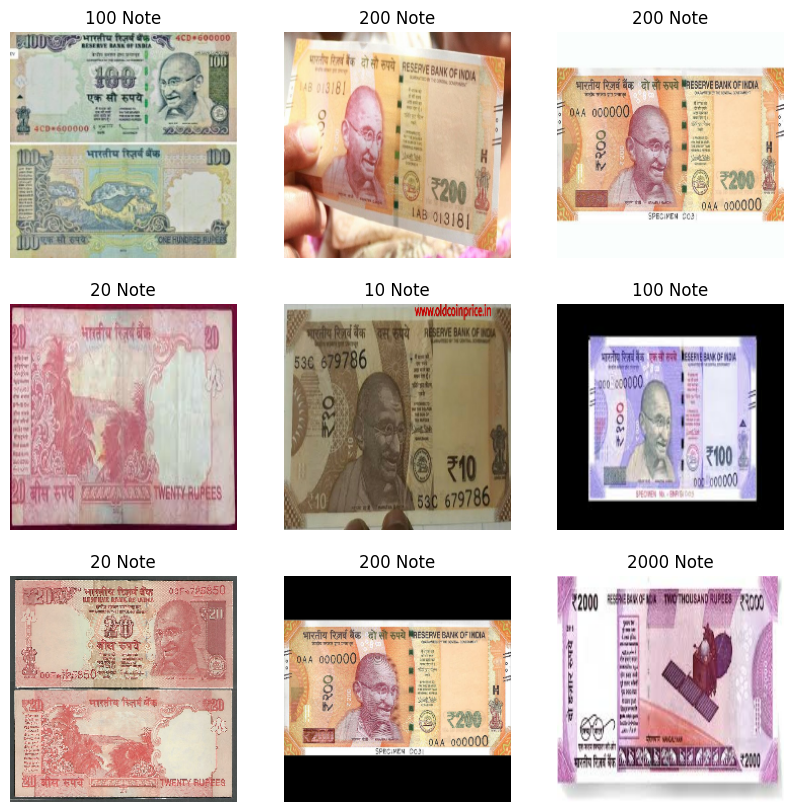

In [17]:
class_names = data.class_names

# displaying few samples from the training data with their class labels
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

plt.title("Example Real World Images from the Dataset")